In [ ]:
import pandas as pd

cleaned_mw_df = pd.read_excel(
    "../1_datasets/cleaned_data/IRENA_OFGStats_mw.cleaned.xlsx",
    sheet_name="Cleaned_data",
)
df_mw = cleaned_mw_df.copy()

In [25]:
print("MW Dataset Info:")
print(df_mw.info())
print("\nMW Dataset Head:")
print(df_mw.head())
print("\nMW Dataset Columns:")
print(df_mw.columns.tolist())

print("\n" + "=" * 50)

# Check for duplicate columns
print("\nDuplicate columns in MW dataset:")
print(df_mw.columns[df_mw.columns.duplicated()].tolist())

MW Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31594 entries, 0 to 31593
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            31594 non-null  object 
 1   Country           31594 non-null  object 
 2   ISO Code          31594 non-null  object 
 3   Flow              31594 non-null  object 
 4   Group Technology  31594 non-null  object 
 5   Sub-Technology    31594 non-null  object 
 6   Technology        31594 non-null  object 
 7   Value             31594 non-null  float64
 8   Unit              31594 non-null  object 
 9   Year              31594 non-null  int64  
 10  Conflict Status   31594 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.7+ MB
None

MW Dataset Head:
   Region Country ISO Code               Flow Group Technology  \
0  Africa  Angola      AGO  Off-grid capacity     Solar energy   
1  Africa  Angola      AGO  Off-grid capacity 

In [26]:
df_mw["Sub-Technology"].unique()

array(['Solar PV (Others)', 'Solar PV (Health)',
       'Solar PV (Commercial/Public)', 'Solar PV (Education)',
       'Solar PV (Not specified)', 'Solar PV (Industry)',
       'Solar PV (Tourism)', 'Solar PV (Public lighting)',
       'Solar PV (Communication)', 'Solar PV (Residential)',
       'Solar PV (Agriculture)', 'Solar PV (Multi-purpose)',
       'Solar mini-grids', 'Solar lights', 'Solar pumps',
       'Solar home systems', 'Onshore wind energy', 'Hydropower',
       'Solar cookers', 'Solar lights and SHS'], dtype=object)

In [27]:
df_mw["Technology"].unique()

array(['Other off-grid solar PV',
       'Other off-grid solar PV (of which health)',
       'Other off-grid solar PV (of which commercial/public)',
       'Other off-grid solar PV (of which education)',
       'Other off-grid solar PV (of which not specified)',
       'Other off-grid solar PV (of which industry)',
       'Other off-grid solar PV (of which tourism)',
       'Other off-grid solar PV (of which public lighting)',
       'Other off-grid solar PV (of which communication)',
       'Other off-grid solar PV (of which residential)',
       'Other off-grid solar PV (of which agriculture)',
       'Other off-grid solar PV (of which multi-purpose)',
       'Solar mini-grids', 'Solar lights (<11 W)', 'Solar pumps',
       'Solar pumps (public water supply)', 'Solar pumps (agriculture)',
       'Solar home systems (SHS 11-50 W)',
       'Solar home systems (SHS >50 W)', 'Onshore wind energy',
       'Hydropower', 'Solar cookers',
       'Solar lights and solar home systems (SHS)'], 

In [28]:
print(df_mw["Conflict Status"].value_counts())

Conflict Status
No Conflict    26748
Conflict        4846
Name: count, dtype: int64


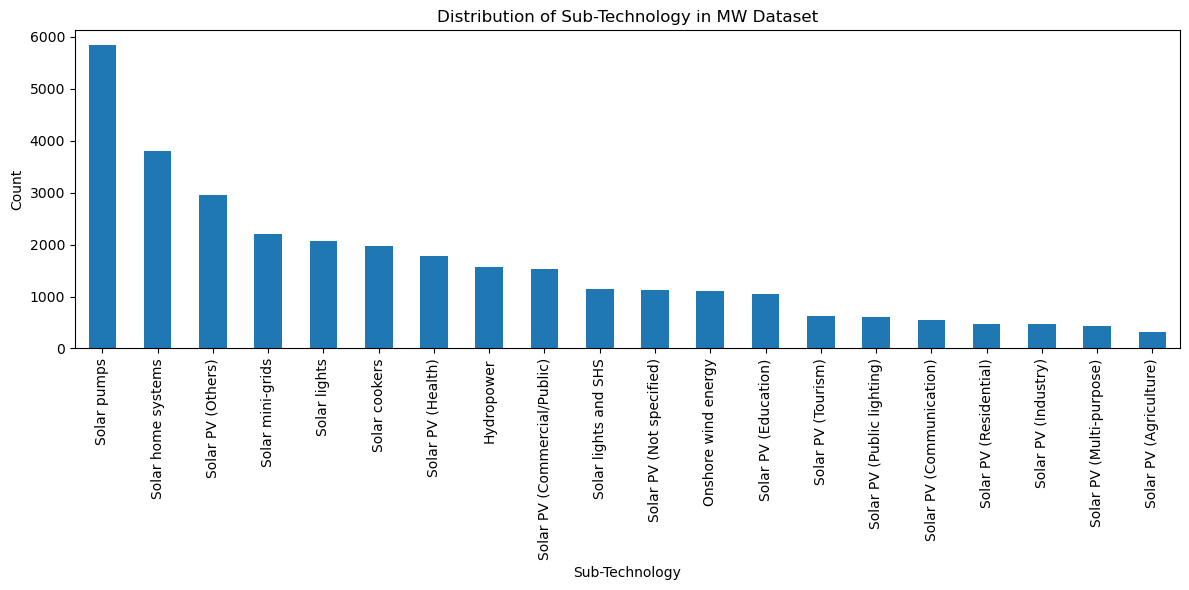

In [29]:
import matplotlib.pyplot as plt

subtech_counts = df_mw["Sub-Technology"].value_counts()
plt.figure(figsize=(12, 6))
subtech_counts.plot(kind="bar")
plt.title("Distribution of Sub-Technology in MW Dataset")
plt.xlabel("Sub-Technology")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

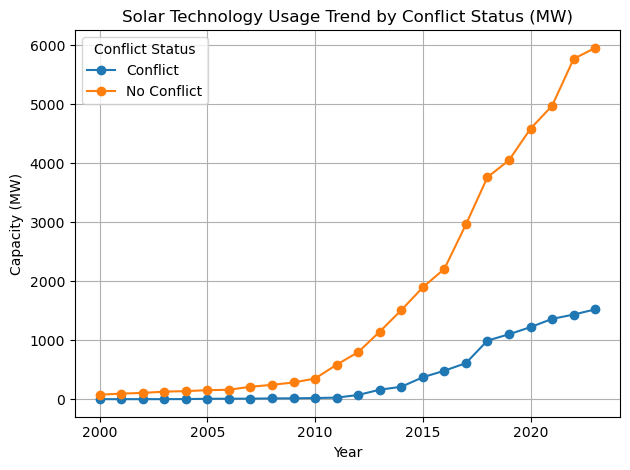

In [ ]:
# Group the data by Year and Conflict Status, calculating the sum of Values
solar_trend_mw = (
    df_mw[df_mw["Group Technology"] == "Solar energy"]
    .groupby(["Year", "Conflict Status"])["Value"]
    .sum()
    .unstack()
)

# Create the plot
plt.figure(figsize=(12, 6))
solar_trend_mw.plot(marker="o")

plt.title("Solar Technology Usage Trend by Conflict Status (MW)")
plt.xlabel("Year")
plt.ylabel("Capacity (MW)")
plt.legend(title="Conflict Status")
plt.grid(True)
plt.tight_layout()
plt.show()

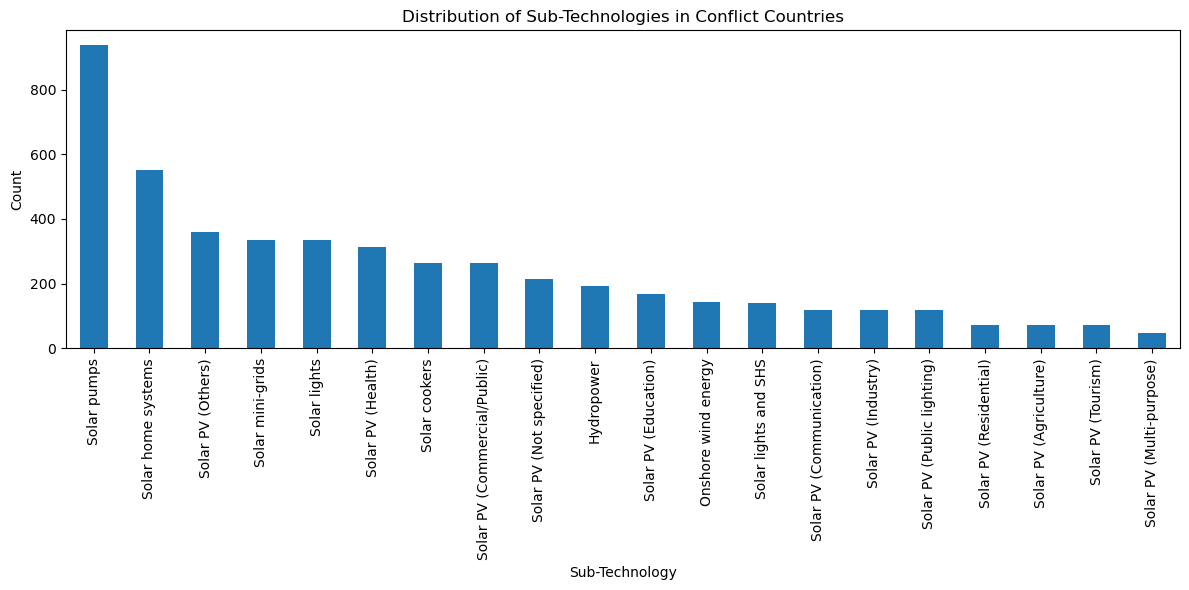

In [ ]:
# Filter data for conflict countries and group by Sub-Technology
conflict_subtech = df_mw[df_mw["Conflict Status"] == "Conflict"][
    "Sub-Technology"
].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
conflict_subtech.plot(kind="bar")
plt.title("Distribution of Sub-Technologies in Conflict Countries")
plt.xlabel("Sub-Technology")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

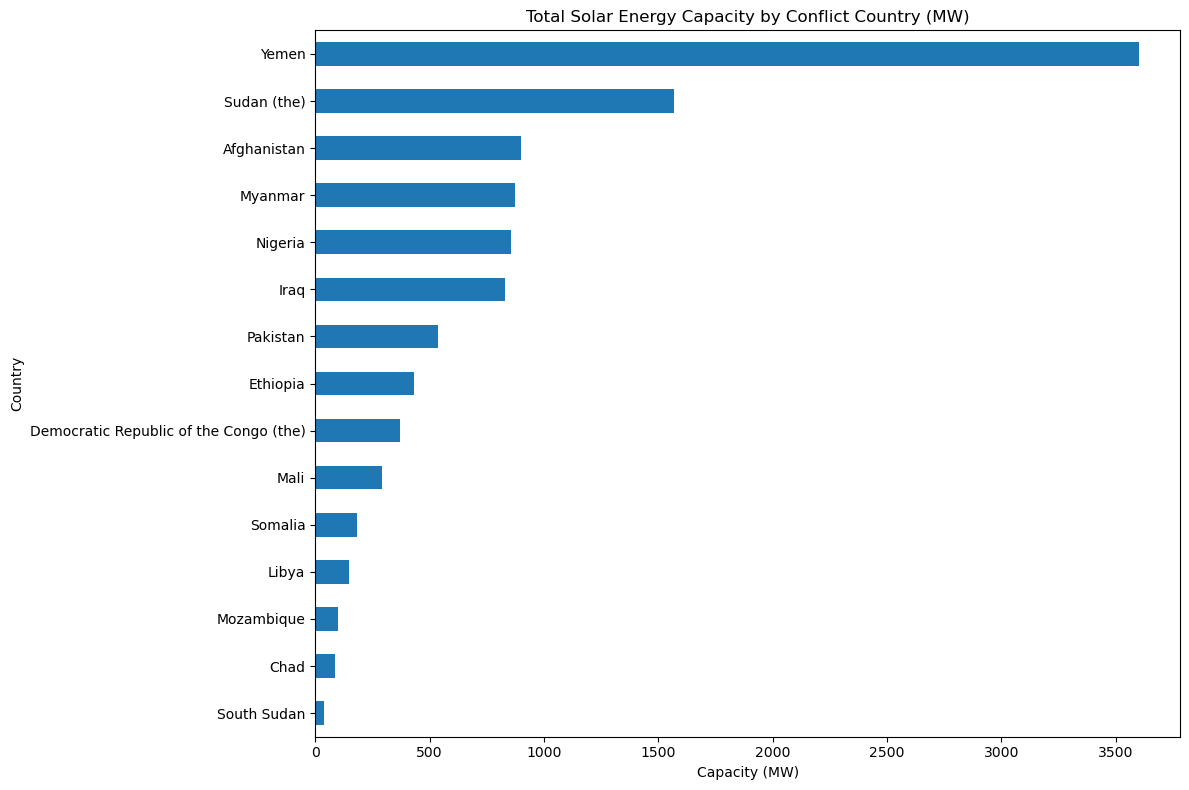

In [ ]:
# Group by country and sum the values for conflict countries
conflict_by_country = (
    df_mw[df_mw["Conflict Status"] == "Conflict"].groupby("Country")["Value"].sum()
)
conflict_by_country = conflict_by_country.sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
conflict_by_country.plot(kind="barh")
plt.title("Total Solar Energy Capacity by Conflict Country (MW)")
plt.xlabel("Capacity (MW)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

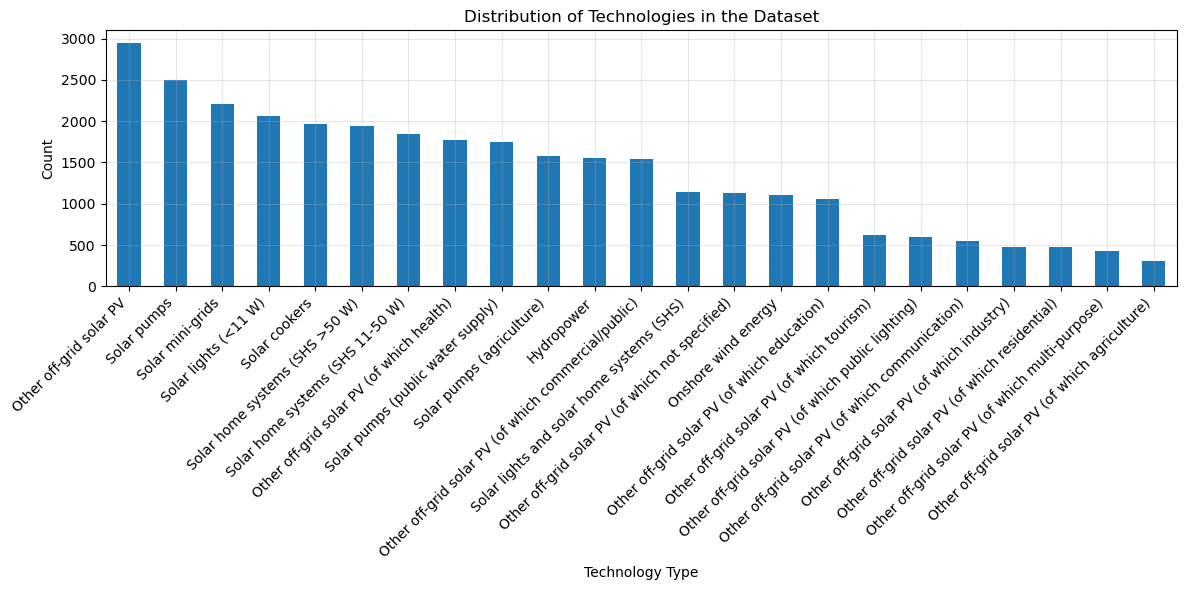

In [ ]:
# Get value counts of Technology
tech_counts = df_mw["Technology"].value_counts()
# Create the plot
plt.figure(figsize=(12, 6))
tech_counts.plot(kind="bar")
plt.title("Distribution of Technologies in the Dataset")
plt.xlabel("Technology Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

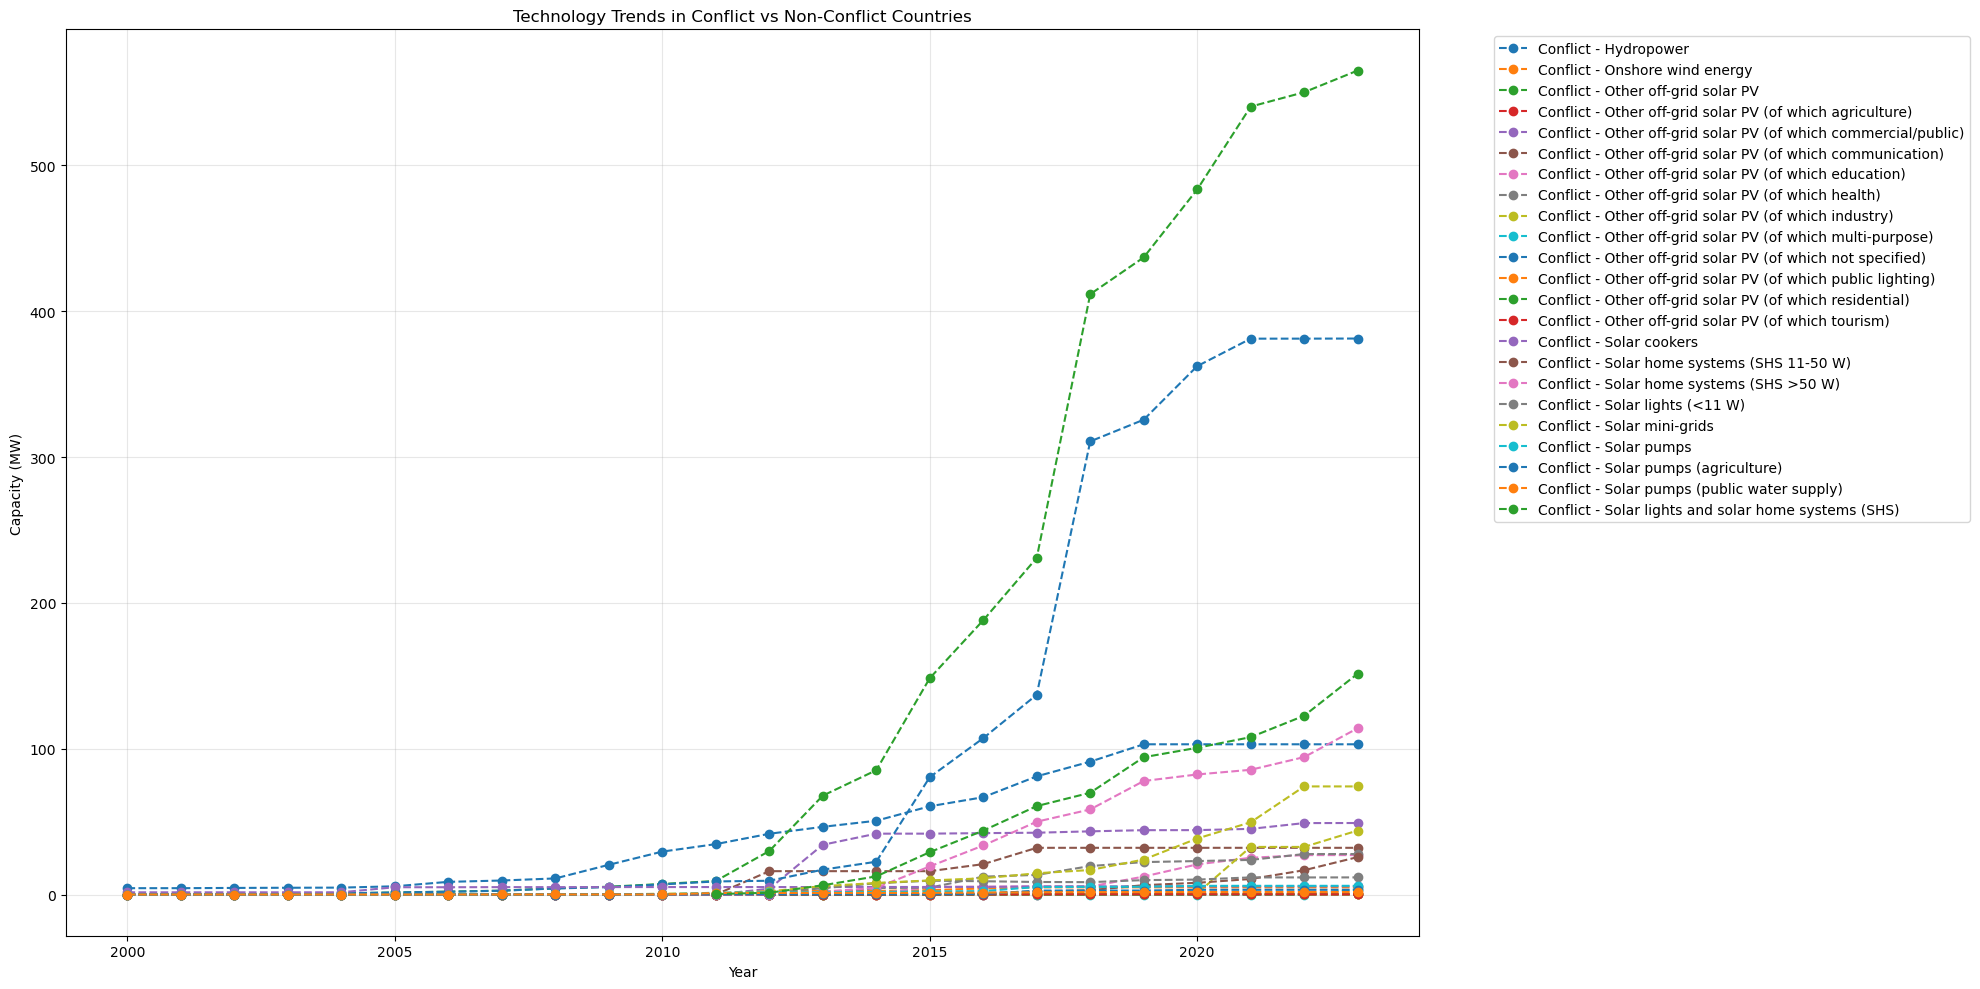

In [ ]:
# Create pivot table for technology distribution by conflict status
tech_conflict_trend = (
    df_mw.groupby(["Year", "Conflict Status", "Technology"])["Value"]
    .sum()
    .reset_index()
)

# Create the plot
plt.figure(figsize=(20, 10))

# Plot for Conflict countries
conflict_data = tech_conflict_trend[
    tech_conflict_trend["Conflict Status"] == "Conflict"
]
for tech in conflict_data["Technology"].unique():
    tech_data = conflict_data[conflict_data["Technology"] == tech]
    plt.plot(
        tech_data["Year"],
        tech_data["Value"],
        linestyle="--",
        marker="o",
        label=f"Conflict - {tech}",
    )

plt.title("Technology Trends in Conflict vs Non-Conflict Countries")
plt.xlabel("Year")
plt.ylabel("Capacity (MW)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

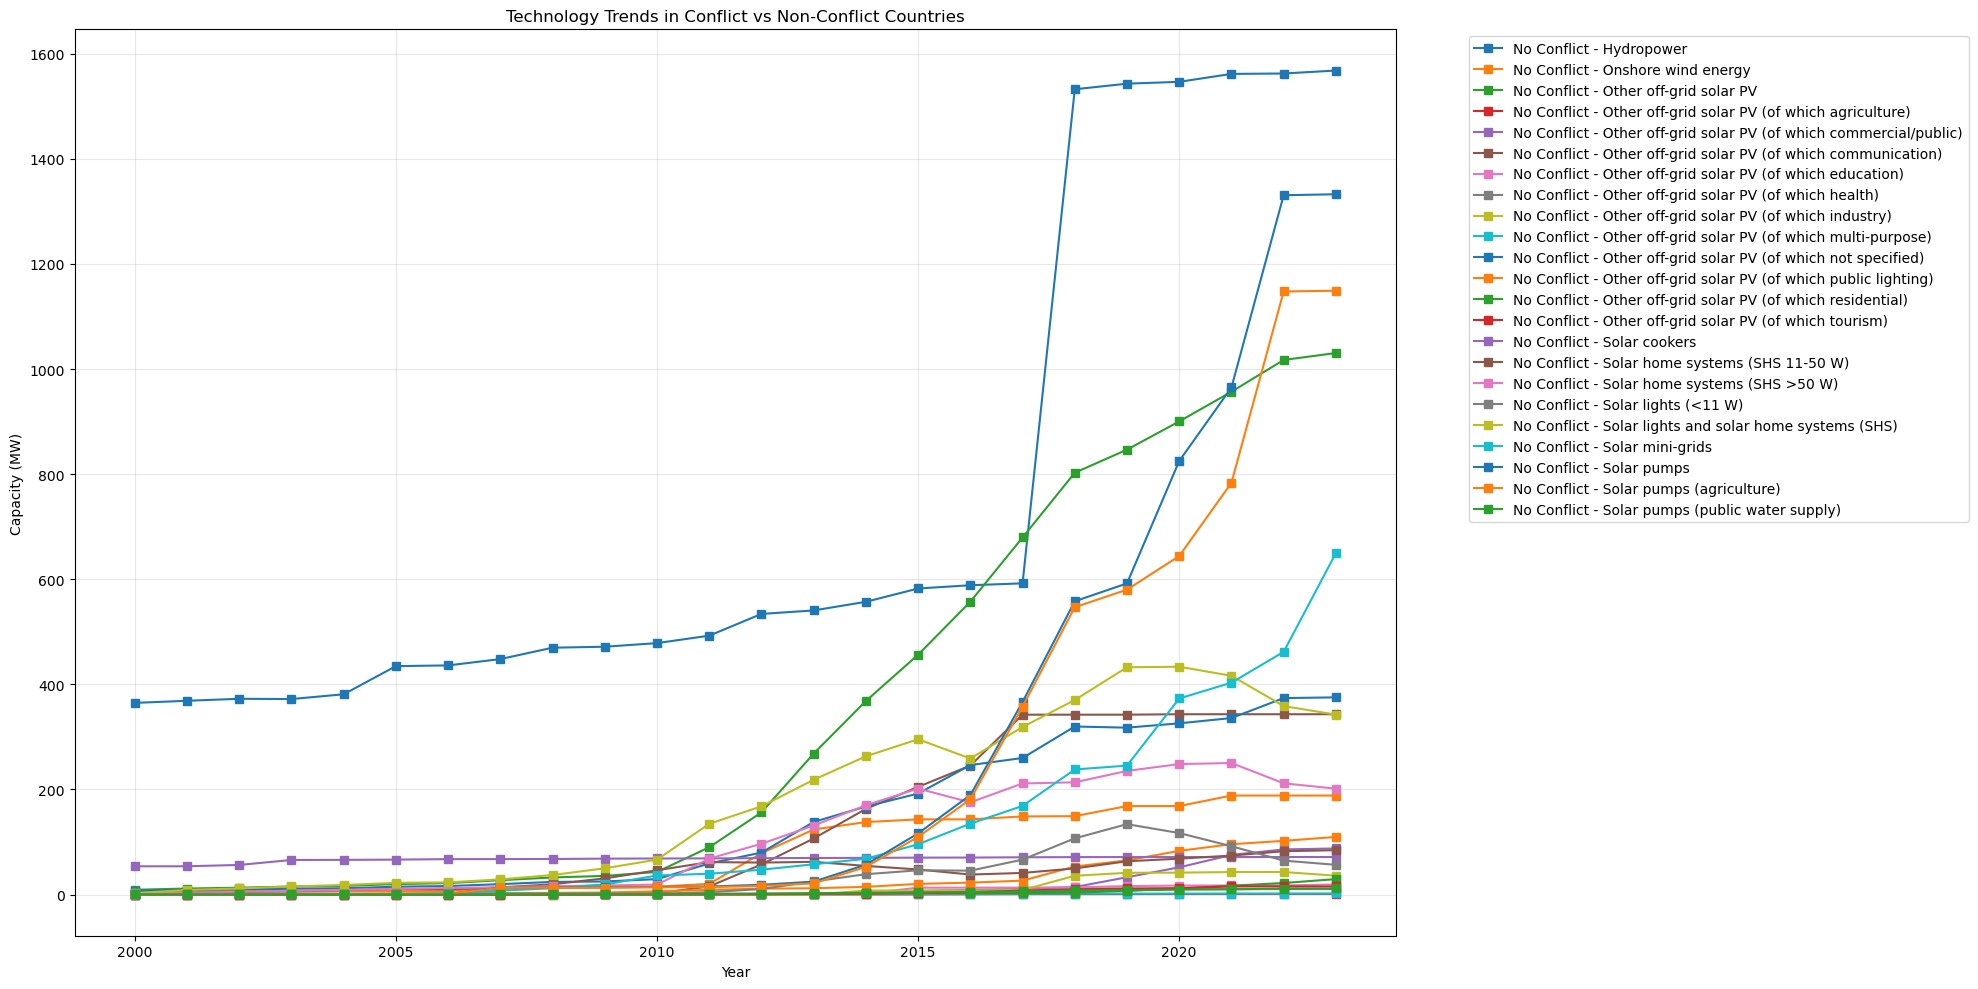

In [43]:
plt.figure(figsize=(20, 10))
no_conflict_data = tech_conflict_trend[
    tech_conflict_trend["Conflict Status"] == "No Conflict"
]
for tech in no_conflict_data["Technology"].unique():
    tech_data = no_conflict_data[no_conflict_data["Technology"] == tech]
    plt.plot(
        tech_data["Year"],
        tech_data["Value"],
        linestyle="-",
        marker="s",
        label=f"No Conflict - {tech}",
    )

plt.title("Technology Trends in Conflict vs Non-Conflict Countries")
plt.xlabel("Year")
plt.ylabel("Capacity (MW)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

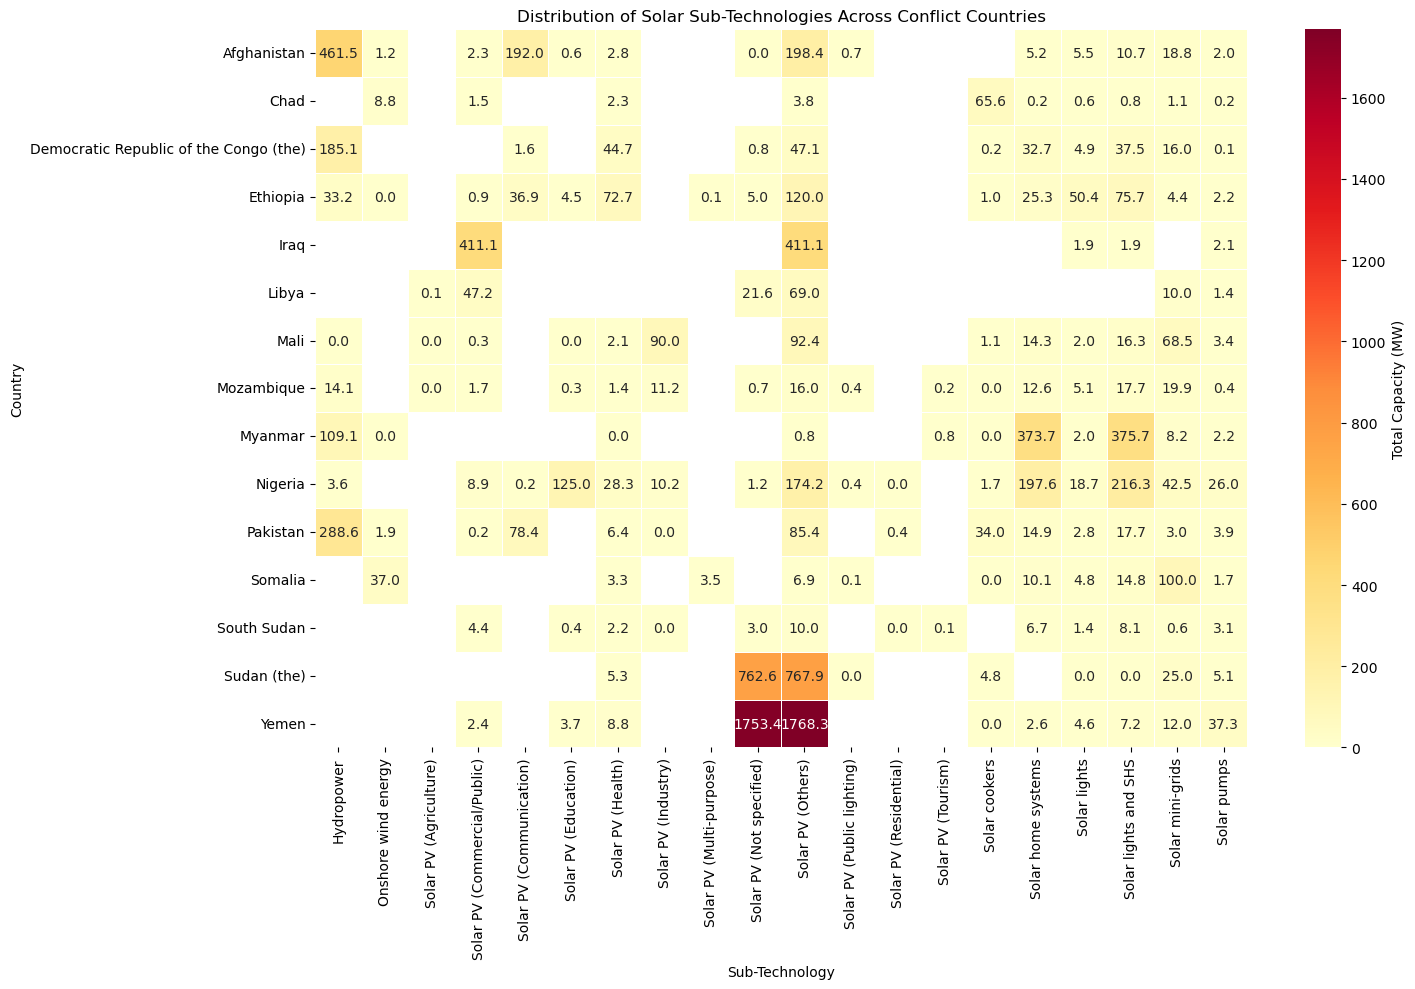

In [ ]:
import seaborn as sns

# Create a pivot table for the heatmap
heatmap_data = pd.pivot_table(
    df_mw[df_mw["Conflict Status"] == "Conflict"],
    values="Value",
    index="Country",
    columns="Sub-Technology",
    aggfunc="sum",
)

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    annot=True,
    fmt=".1f",
    cbar_kws={"label": "Total Capacity (MW)"},
    linewidths=0.5,
)

plt.title("Distribution of Solar Sub-Technologies Across Conflict Countries")
plt.xlabel("Sub-Technology")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

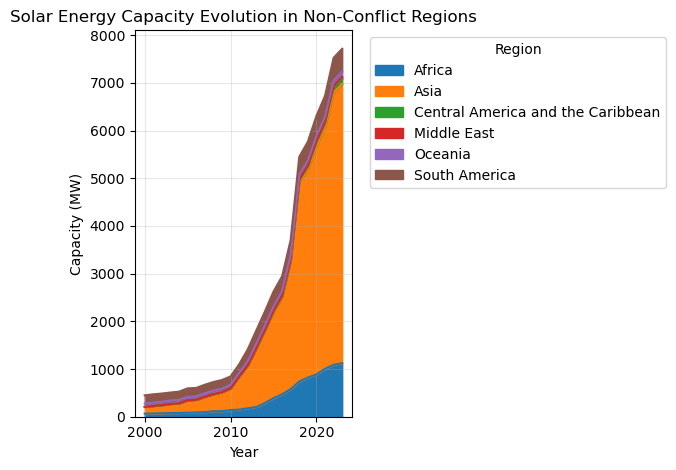

In [ ]:
# Group the data by Region and Year for non-conflict countries, calculating the sum of Values
non_conflict_regional = (
    df_mw[df_mw["Conflict Status"] == "No Conflict"]
    .groupby(["Year", "Region"])["Value"]
    .sum()
    .unstack()
)

# Create a stacked area plot
plt.figure(figsize=(15, 8))
non_conflict_regional.plot(kind="area", stacked=True)

plt.title("Solar Energy Capacity Evolution in Non-Conflict Regions")
plt.xlabel("Year")
plt.ylabel("Capacity (MW)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()